In [1]:
# for fast array manipulation
import numpy as np
# for plotting
import matplotlib.pyplot as plt
# for numerical ODE integration
from scipy.integrate import odeint
# for nonlinear equations
from scipy.optimize import fsolve
from matplotlib.pyplot import cm
# needed to calculate (complex) squareroots of negative numbers
from scipy import sqrt,integrate
#nullcline
import PyDSTool as dst
from PyDSTool.Toolbox import phaseplane as pp
from PyDSTool import args
# to display plots in-line
%matplotlib inline


#import sympy for fixed points?
import sympy as sm

#widget
from ipywidgets import interact, interactive
from IPython.display import clear_output, display, HTML
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import cnames
from matplotlib import animation

In [2]:
# minimum and maximum E and I values we want displayed in the graph-sayshttp://martinosorb.github.io#variables
tau=0.01
# w_ee=15
# w_ei=-15
# w_ie=10
# w_ii=-5
# e=0
d_t=0.001
#initial values for euler
tv= np.arange(0,1,d_t)

E0=0.1
I0=0.7
t0=0


#plot size
minval = -1
maxval = 1
resolution = 15

# State variables
eq = np.linspace(minval, maxval, resolution)
iq = np.linspace(minval, maxval, resolution)

#define tanh[x_+]
def wow(x):
    y = np.maximum(0,x)
    return np.tanh(y)

In [5]:


def Biiiig(w_ee=15,w_ei=-15,w_ie=10,w_ii=-5,e=0):  #gonna put almost everything in here
    E=[E0]
    I=[I0]
    

    #let's start euler
    def amidoingright(E,I,w_ee=w_ee,w_ei=w_ei,w_ie=w_ie,w_ii=w_ii,e=e):
        d_E = (-E+wow(w_ee*E+w_ei*I+e))/tau
        d_I=(-I+wow(w_ie*E+w_ii*I))/tau
        return [d_E, d_I]

    for n in range(len(tv)-1):
        EI=amidoingright(E[n],I[n])
        d_Ef=d_t*EI[0]+E[n]
        d_If=d_t*EI[1]+I[n]
        E.append(d_Ef)
        I.append(d_If)


    #try nullclining
    enc=np.arange(-1,1,0.01)
    inc=np.arange(-1,1,0.01)
    En,In=np.meshgrid(enc,inc)
    levels = [0]
    Zn1=(-En+wow(w_ee*En+w_ei*In+e))/tau
    Zn2=(-In+wow(w_ie*En+w_ii*In))/tau

    #plot?
    #vector field is pretty
    # Create a grid for evaluation of the vector field
    eq1,iq1 = np.meshgrid(eq, iq)
    # Evaluate the slopes
    deq1, diq1 = amidoingright(eq1, iq1)
    # Compute the magnitude vector
    M = (np.hypot(deq1, diq1))
    M[M==0]=1, #avoid zero division?
    # Normalize the slopes vectors (for the field plot)
    deq1, diq1=deq1/M, diq1/M

    #plotting
    plt.figure(figsize=(6,6))
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    cs1=plt.contour(En,In,Zn1,levels,colors=('b'),linewidths=2)
    cs2=plt.contour(En,In,Zn2,levels,colors=('c'),linewidths=2)
    plt.quiver(eq1,iq1,deq1,diq1, M,pivot='mid', headlength = 5, cmap=cm.plasma)
    plt.plot(E,I,'r.-',zorder=1, linewidth=2)
    plt.grid()
    plt.xlabel('E', fontsize=16)
    plt.ylabel('I', fontsize=16)
   

    #starting point & fixed point
#     I_f=0
#     E_f=0
    plt.scatter(E0, I0, marker='H', c='c', s=200, label="Starting point", edgecolor="k")
    #plt.scatter(I_f, E_f, marker='p', c='m', s=200, label="Fixed point", edgecolor="k")
    
    #plt.legend(loc="upper left")
    
    #plot the solution in time
    plt.figure(figsize=(10,3))
    plt.ylabel('E, I')
    plt.xlabel('t')
    plt.plot(tv, E, 'c-', label="excitatory");
    plt.plot(tv, I, 'm-', label="inhibitory");
    plt.ylim([-0.9,0.9])
    plt.legend();
    plt.show()

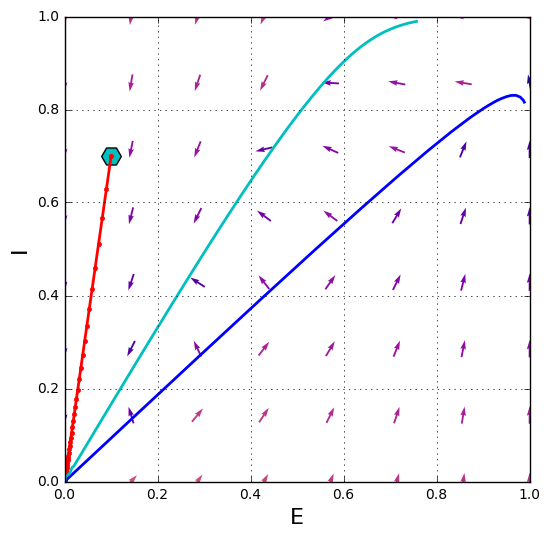

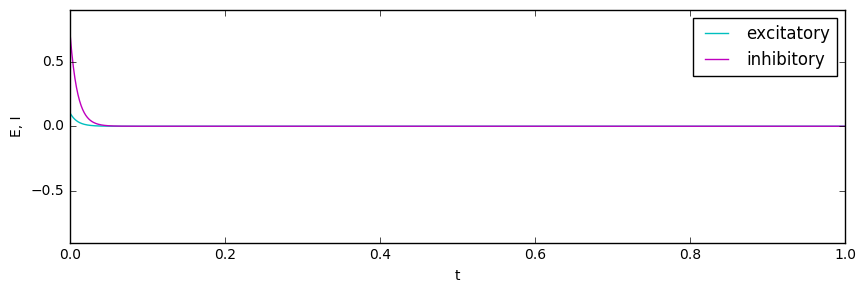

In [6]:
w = interactive(Biiiig, w_ee=(-30,30),w_ei=(-30,30),w_ie=(-30,30),w_ii=(-30,30),e=(-10,10))
display(w)